<a href="https://colab.research.google.com/github/gauriverma19/Machine-Learning-in-Finance/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM FOR BMY STOCK PREDICTION**

We will train a Recurrent Neural Network (LSTM). We will use one of the deep learning libraries, Keras, to build the neural network.

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.



In [ ]:
#importing necessary libraries

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

#reading web data
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 7, 31)

df = web.DataReader("BMY", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,58.619999,57.349998,57.549999,58.049999,12372000.0,57.616718
2020-07-28,59.820000,58.240002,58.549999,59.430000,9816300.0,58.986420
2020-07-29,59.400002,58.590000,59.160000,59.150002,7357900.0,58.708511
2020-07-30,59.150002,58.340000,58.799999,58.869999,7175200.0,58.430595
2020-07-31,59.090000,57.770000,58.880001,58.660000,10443000.0,58.222164


In [ ]:
#training the data
training_set = df.iloc[:,1:2].values

print(training_set)
print("********************")
print(df.shape)

[[66.37999725]
 [67.41999817]
 [66.84999847]
 ...
 [58.59000015]
 [58.34000015]
 [57.77000046]]
********************
(1153, 6)


# Feature scaling
The performance of the neural network will be better if the entire training input is in the same range. As we can see from above the stock prices are not in the same range. So, we need to scale the training data such that they are in the same range. This process is called Feature Scaling. The two popular methods for feature scaling are:

Standardization
$ x' = \frac{x - \bar{x}}{\sigma} $

where $ x $ is the original feature vector, $ \bar{x} $ is the mean of that feature vector, and $ \sigma $ is its standard deviation.

Normalization (Min-Max normalization)
$ x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)} $

where $ x $ is an original value, $ x' $ is the normalized value.

It is recommended to use Normalization in the case of RNN networks. Therefore we use Min-Max normalization here. You may also experiment with different feature scaling methods.

In [ ]:
#implementing feature scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.70689136],
       [0.73765151],
       [0.7207926 ],
       ...,
       [0.47648625],
       [0.46909198],
       [0.45223308]])

In [ ]:
#scaled training sets

X_train = []
y_train = []
for i in range(60,1153):#1258
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
#shape of training data
print(X_train.shape)
print(y_train.shape)

(1093, 60)
(1093,)


# Reshaping:

The input shape of the LSTM is 3D tensor with shape (batch_size, timesteps, input_dim). Batch_size represents the number of iterations required to traverse through the entire training data. Timesteps represent the number of inputs required for each prediction. In our scenario it is 60.

In [ ]:
#reshaping the training data

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1093, 60, 1)

# **Building the Neural Network**

In [ ]:
#importing libraries for building the neural netowkr using Keras sequential layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#--------------------------------------------#
#  Initialization and Adding layers to RNN   #
#--------------------------------------------#
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))   # the first LSTM layer
regressor.add(Dropout(0.2))                     

regressor.add(LSTM(units = 50, return_sequences= True))  # the second LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))  # the third LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))  # the fourth LSTM layer
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))   # the dense layer

In [ ]:
#-----------------------------------------------------#
#  Compiling and Fitting the RNN to the Training set  #
#-----------------------------------------------------#

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

# the loss function "mean_squared_error"(MSE) is used because it is a Regression problem.
# epochs = no of iterations. After every 32 (batch_size) datasets, the MSE will be calculated and 
# the tweaks will be Back Propagated i.e., the weights will be tweaked for every 32 training datasets.

Epoch 1/100
35/35 [==============================] - 3s 88ms/step - loss: 0.0417
Epoch 2/100
35/35 [==============================] - 3s 99ms/step - loss: 0.0133
Epoch 3/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0116
Epoch 4/100
35/35 [==============================] - 3s 95ms/step - loss: 0.0102
Epoch 5/100
35/35 [==============================] - 4s 100ms/step - loss: 0.0090
Epoch 6/100
35/35 [==============================] - 3s 99ms/step - loss: 0.0091
Epoch 7/100
35/35 [==============================] - 4s 101ms/step - loss: 0.0087
Epoch 8/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0073
Epoch 9/100
35/35 [==============================] - 4s 101ms/step - loss: 0.0065
Epoch 10/100
35/35 [==============================] - 4s 100ms/step - loss: 0.0077
Epoch 11/100
35/35 [==============================] - 4s 102ms/step - loss: 0.0064
Epoch 12/100
35/35 [==============================] - 4s 104ms/step - loss: 0.0058
Epoch 13/100
35/35 

# **Making Predictions**

In [ ]:
#end = datetime.datetime(2020, 7, 31)

start = datetime.datetime(2020, 8, 1)
end = datetime.datetime(2020, 9, 1)
dataset_test= web.DataReader("BMY", 'yahoo', start, end)

actual_stock_price = dataset_test.iloc[:,1:2].values

# getting the Predicted Stock Prices of August 2020
# Step1 - preparing the input for the model
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)    # axis 0 = vertical concatination
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values   # so that we can get the base index

inputs = inputs.reshape(-1,1)     # before Reshaping- (80,) after Reshaping- (80,1)
inputs = scaler.transform(inputs) # we don't need to fit because we want to use the previously calculated min & max values.

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

# Step2 - prediction
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

We "tranform" the inputs because we want to maintain the consistency w.r.t what we feed to the network. In the end we "reverse transform" the data for the convenience of plotting. As you can see in the next section, the actual and predicted stock prices are in the original scale and are not in the transformed state.



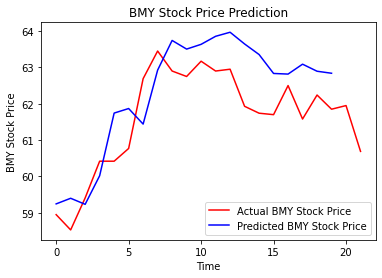

In [ ]:
#comparing predicted prices

plt.plot(actual_stock_price, color = 'red', label = 'Actual BMY Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BMY Stock Price')
plt.title('BMY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BMY Stock Price')
plt.legend()

The model can be further improved and experimented by considering the following (but not limited to):

* Training the model with more data. Eg: Here we have used 5 years of stock prices but you can train the model with 10 years of data.
* Increasing the number of timesteps.
* Adding more LSTM layers.
* Increasing the units in the LSTM layer.
* Adding some other indicators. Eg: If you have the financial instinct that the stock price of some other companies might be correlated to the one of BMY, you could add this other stock price as a new indicator in the training data.